In [2]:
# !pip install cirq

In [7]:
import cirq
from swap_test import SwapTest
import pandas as pd
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm

In [8]:
class QuantumKMeans:
    def __init__(self,data_csv,num_clusters,features,copies=1000,iters=100):
        self.data_csv = data_csv
        self.num_clusters = num_clusters
        self.features = features
        self.copies = copies
        self.iters = iters

    def data_preprocess(self):
        df = pd.read_csv(self.data_csv)
        df=df[self.features]
        df["n_1_H"]=df ["n_1_H"]/100
       
        df['theta'] = df.apply(lambda x: math.atan(x[self.features[1]]/x[self.features[0]]), axis=1) #arc tangent of a number (x) as 
        self.X = df.values[:,:2]                                                                     #a numeric value between -PI/2 and PI/2 radians
        self.row_norms = np.sqrt((self.X**2).sum(axis=1))
        self.X = self.X/self.row_norms[:, np.newaxis]
        self.X_q_theta = df.values[:,2]
        self.num_data_points = self.X.shape[0]
        return self.X,self.X_q_theta
                           
    def distance(self,x,y):
        st = SwapTest(prepare_input_states=True, input_state_dim=2, measure=True,copies=self.copies)
        st.build_circuit(input_1_transforms=[cirq.ry(x)],input_2_transforms=[cirq.ry(y)])
        prob_0, _ = st.simulate()
        _distance_ = 1 - prob_0
        del st
        return _distance_
                           
    def init_clusters(self):
        self.cluster_points=np.random.randint(self.num_data_points,size=self.num_clusters)
        self.cluster_data_points = self.X[self.cluster_points,:]
        self.cluster_theta = self.X_q_theta[self.cluster_points]
        self.clusters = np.zeros(len(self.X_q_theta))

    def assign_clusters(self):
        self.distance_matrix = np.zeros((self.num_data_points,self.num_clusters))
        for i,x in enumerate(list(self.X_q_theta)):
            for j,y in enumerate(list(self.cluster_theta)):
                self.distance_matrix[i, j] = self.distance(x,y)
        self.clusters = np.argmin(self.distance_matrix,axis=1)
        
        
    def update_clusters(self):
        updated_cluster_data_points = []
        updated_cluster_theta = []
        for k in range(self.num_clusters):
            centroid = np.mean(self.X[self.clusters == k],axis=0)
            
            centroid_theta = math.atan(centroid[1]/centroid[0])
            updated_cluster_data_points.append(centroid)
            updated_cluster_theta.append(centroid_theta)
        self.cluster_data_points= np.array(updated_cluster_data_points)
        self.cluster_theta = np.array(updated_cluster_theta)
        print(self.cluster_data_points)
        print(self.cluster_theta)
  
    def plot(self):
        fig = plt.figure(figsize=(8, 8))
        colors = ['red', 'green', 'blue', 'purple','yellow','black','orange','pink','brown','gold','gray']
        plt.scatter(self.X[:,0],self.X[:,1],c=self.clusters,
        cmap=matplotlib.colors.ListedColormap(colors[:self.num_clusters]))
        plt.savefig('Clusters.png')
        
        
    def run(self):
        self.data_preprocess()
        self.init_clusters()
        for i in  tqdm(range(self.iters)):
            print("#################################")
            print(i)
            
            self.assign_clusters()
            self.update_clusters()
            self.plot()
        
    def outputs_data(self):
        return self.clusters
    

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

#################################
0


 10%|████████▎                                                                          | 1/10 [00:22<03:19, 22.16s/it]

[[0.74769476 0.66006667]
 [0.35049916 0.93407304]
 [0.68650053 0.72412397]
 [0.68788537 0.71786528]
 [0.26559532 0.95870817]
 [0.98475382 0.15855753]
 [0.9749352  0.19323228]
 [0.62673765 0.77411885]
 [0.90255051 0.42466247]
 [0.81987153 0.57188816]]
[0.72323197 1.21181752 0.81206332 0.80672155 1.30053956 0.1596422
 0.19566432 0.89022047 0.43978164 0.60906893]
#################################
1
[[0.74426365 0.66472112]
 [0.34624943 0.93594008]
 [0.68020079 0.73130259]
 [0.64716377 0.7603613 ]
 [0.2445504  0.96705003]
 [0.98817802 0.14252442]
 [0.96370129 0.24293233]
 [0.57662745 0.81548149]
 [0.89292389 0.44206713]
 [0.8207384  0.57074555]]
[0.72900424 1.21646189 0.82158617 0.86564855 1.3231062  0.14324171
 0.2469378  0.95532074 0.4597024  0.60763538]


 20%|████████████████▌                                                                  | 2/10 [00:46<03:07, 23.48s/it]

#################################
2
[[0.74182485 0.6675498 ]
 [0.37849289 0.92363903]
 [0.67070496 0.73982834]
 [0.6252677  0.77811069]
 [0.2264041  0.97331579]
 [0.99007399 0.12697525]
 [0.96422626 0.25951375]
 [0.55116215 0.8338179 ]
 [0.89210336 0.4471343 ]
 [0.8156669  0.57773399]]
[0.73274616 1.18188366 0.83436413 0.89388133 1.3422494  0.12755198
 0.26291192 0.98671996 0.46461798 0.61627239]


 30%|████████████████████████▉                                                          | 3/10 [01:12<02:50, 24.41s/it]

#################################
3
[[0.73236388 0.6775179 ]
 [0.36340059 0.93045566]
 [0.66198454 0.74713765]
 [0.58262682 0.81120635]
 [0.21787082 0.97558135]
 [0.99056554 0.12666241]
 [0.95650756 0.28561319]
 [0.52657873 0.85000754]
 [0.87175753 0.48376079]
 [0.80829367 0.58716475]]
[0.74651665 1.19845257 0.84575467 0.94794476 1.35107761 0.12717864
 0.29017193 1.01616265 0.50661719 0.62824162]


 40%|█████████████████████████████████▏                                                 | 4/10 [01:34<02:22, 23.80s/it]

#################################
4
[[0.74079274 0.66904077]
 [0.36732979 0.92895405]
 [0.66067619 0.74966043]
 [0.59463528 0.80335099]
 [0.22731584 0.97302087]
 [0.9910871  0.12335415]
 [0.95389596 0.29121293]
 [0.51449576 0.85749293]
 [0.87482262 0.4795478 ]
 [0.81058856 0.58417503]]
[0.73454811 1.19424186 0.84840897 0.93360089 1.34129381 0.1238267
 0.29630102 1.03037683 0.50143387 0.62447081]


 50%|█████████████████████████████████████████▌                                         | 5/10 [01:57<01:56, 23.40s/it]

#################################
5
[[0.73217856 0.67900879]
 [0.3618317  0.9313873 ]
 [0.66507949 0.74452123]
 [0.6141083  0.78854145]
 [0.2264041  0.97331579]
 [0.98873994 0.13728656]
 [0.94193396 0.32828553]
 [0.50251936 0.86357847]
 [0.86214642 0.50304324]
 [0.81210471 0.58252782]]
[0.74773864 1.20025432 0.84169623 0.90912269 1.3422494  0.13796789
 0.33535829 1.04378934 0.52818218 0.62224674]


 60%|█████████████████████████████████████████████████▊                                 | 6/10 [02:19<01:32, 23.01s/it]

#################################
6
[[0.72835627 0.68286191]
 [0.36803113 0.92872719]
 [0.6569314  0.7529477 ]
 [0.59342317 0.80255651]
 [0.2264041  0.97331579]
 [0.98696249 0.14627307]
 [0.94273538 0.32519469]
 [0.5386617  0.84252215]
 [0.86040505 0.50411641]
 [0.80643831 0.59069281]]
[0.75317167 1.1935055  0.85339568 0.93410343 1.3422494  0.14713428
 0.33216708 1.00194847 0.52999174 0.63218795]


 70%|██████████████████████████████████████████████████████████                         | 7/10 [02:41<01:07, 22.61s/it]

#################################
7


C:\Users\cmos\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\cmos\anaconda3\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


[[0.72567064 0.68615022]
 [0.38268519 0.92191438]
 [0.64925263 0.75849169]
 [0.57253272 0.81835681]
 [0.23527582 0.97083794]
 [0.98956976 0.13297907]
 [0.94293838 0.3245815 ]
 [       nan        nan]
 [0.85202948 0.51960384]
 [0.80491664 0.59234611]]
[0.75741295 1.17734222 0.86284162 0.96033043 1.3330371  0.13358045
 0.33151943        nan 0.54762526 0.63442228]


 80%|██████████████████████████████████████████████████████████████████▍                | 8/10 [03:03<00:45, 22.98s/it]


#################################
8


ValueError: probabilities contain NaN

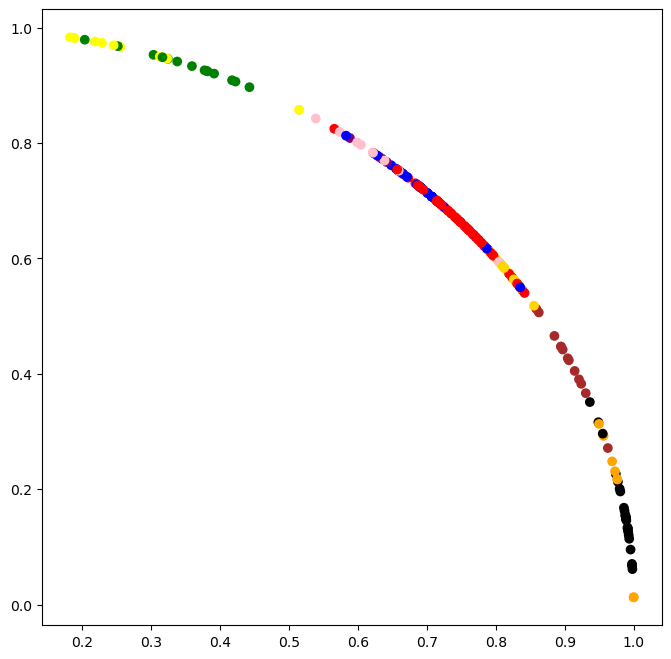

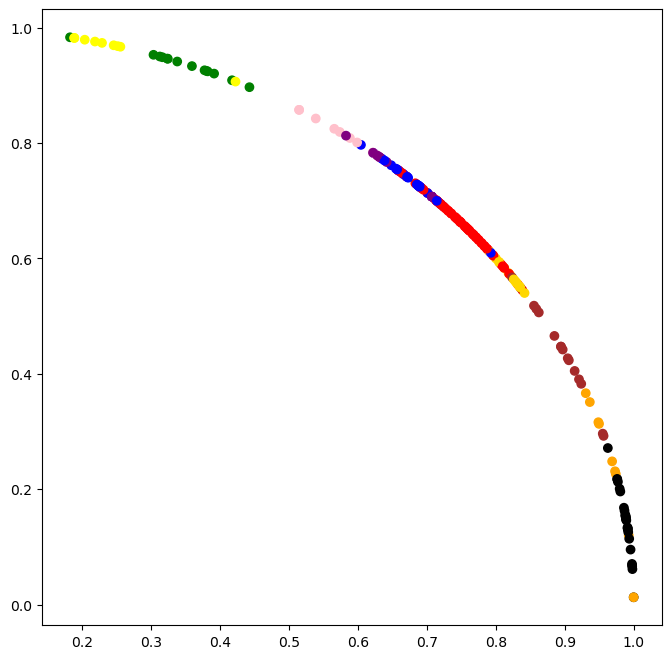

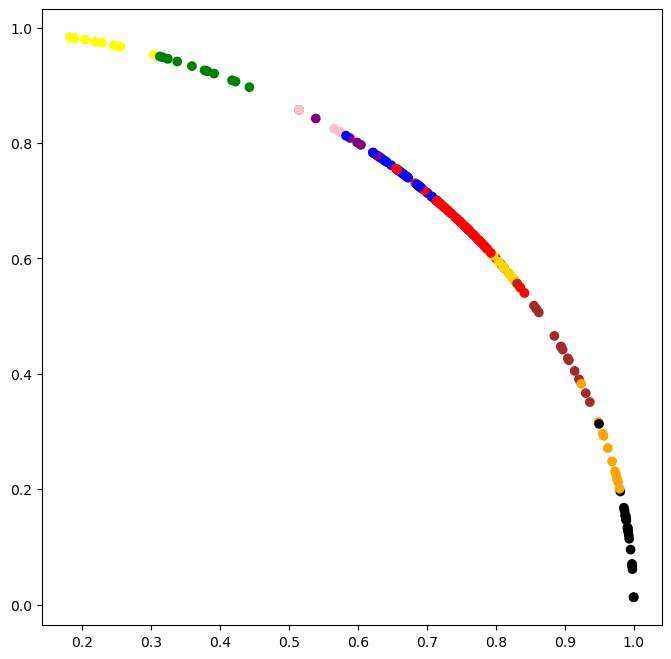

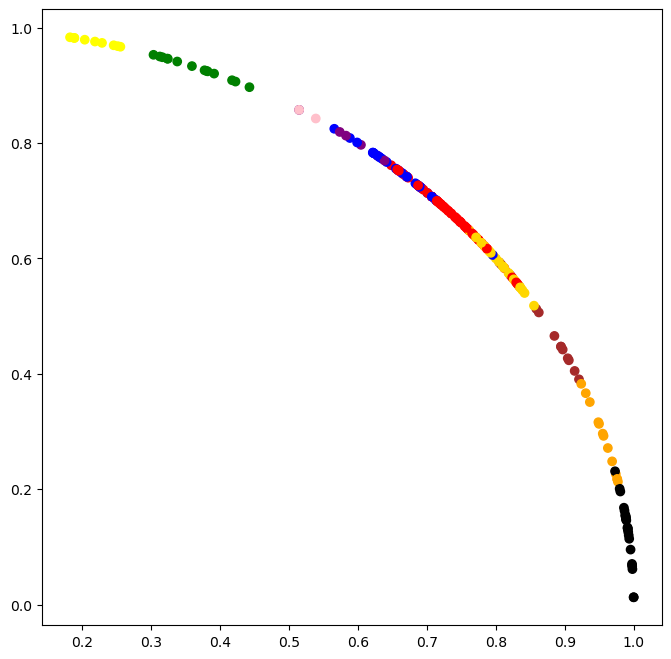

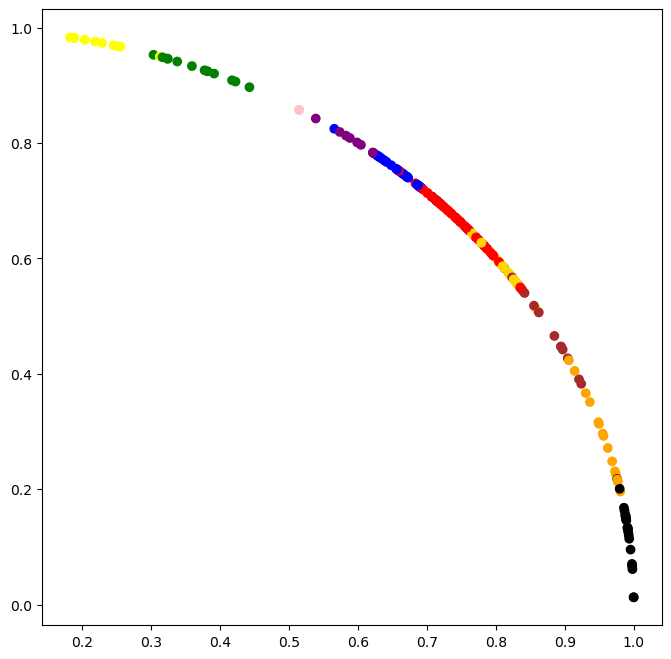

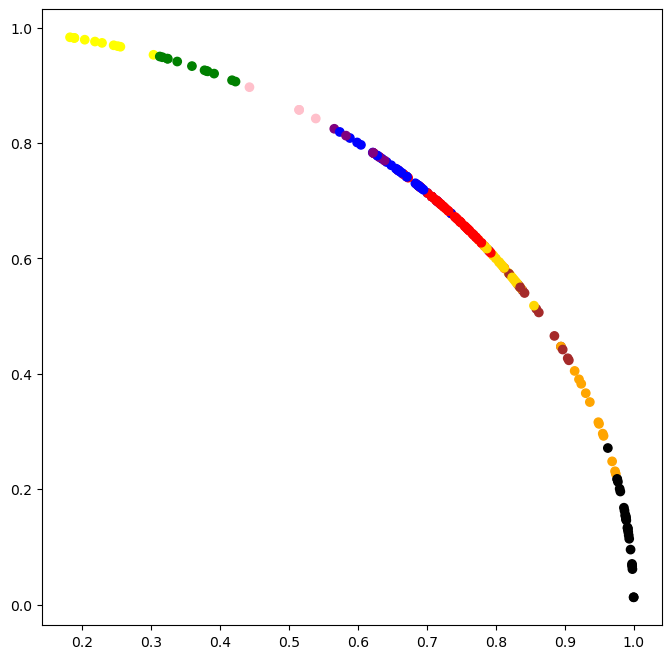

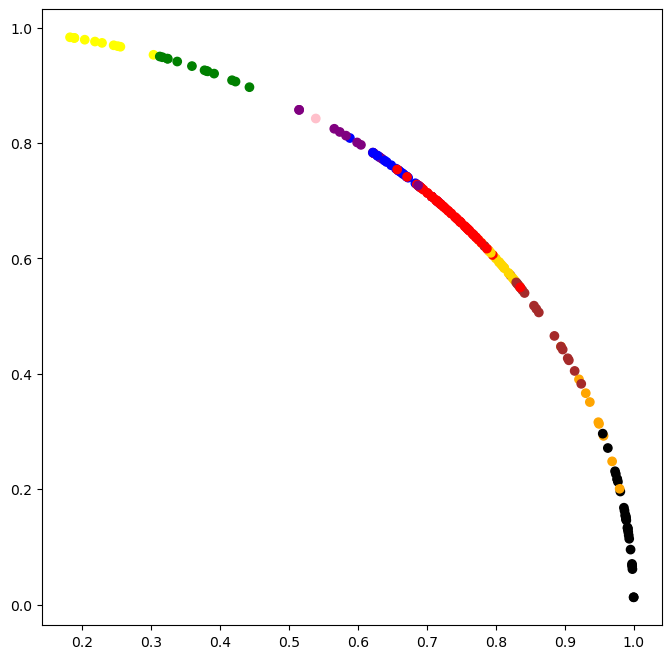

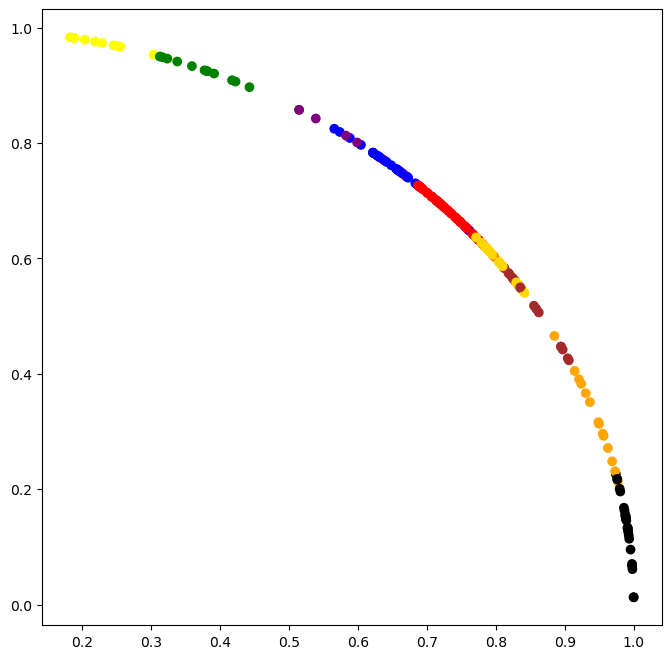

In [17]:
if __name__ == '__main__':
    data_csv ='Mall_Customers.csv'
    num_clusters = 10
    Qkmeans = QuantumKMeans(data_csv=data_csv, num_clusters=num_clusters,iters=10,features=['Annual Income ','Spending Score '])
    Qkmeans.run()

In [78]:
Qkmeans.outputs_data()

array([0, 0, 6, 0, 1, 0, 2, 0, 2, 0, 7, 0, 3, 0, 7, 0, 1, 0, 3, 0, 1, 0,
       2, 0, 6, 0, 4, 1, 3, 0, 2, 1, 2, 0, 6, 1, 6, 1, 7, 1, 3, 1, 3, 4,
       3, 1, 4, 3, 3, 3, 4, 4, 3, 4, 4, 3, 4, 3, 3, 3, 4, 3, 4, 4, 3, 4,
       3, 3, 4, 3, 3, 3, 3, 4, 3, 3, 3, 5, 3, 5, 3, 5, 5, 3, 4, 3, 3, 3,
       3, 5, 3, 7, 5, 5, 7, 3, 5, 3, 3, 3, 7, 3, 3, 5, 3, 7, 3, 3, 5, 5,
       5, 3, 5, 3, 7, 3, 7, 3, 7, 3, 3, 6, 5, 4, 6, 4, 6, 4, 2, 3, 2, 4,
       6, 3, 2, 4, 2, 3, 2, 3, 2, 4, 6, 4, 2, 4, 6, 3, 2, 4, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 6, 3, 2, 4, 2, 3, 2, 3, 2, 7, 2, 5, 2, 3, 2, 3,
       2, 5, 2, 3, 2, 3, 2, 3, 6, 3, 2, 5, 2, 3, 2, 7, 2, 5, 2, 7, 2, 6,
       2, 6], dtype=int64)

In [35]:
data_csv =pd.read_csv('Mall_Customers.csv')
data_csv[['Annual Income ','Spending Score ']]

,Annual Income,Spending Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [36]:
data_csv.dtypes

CustomerID          int64
Genre              object
Age                 int64
Annual Income       int64
Spending Score      int64
dtype: object

In [64]:
data=pd.read_csv("all_datasets_shuffeled (1).csv")
# data['E_0_H']=data['E_0_H'].round(decimals=2)
data['E_0_H']=data['E_0_H'].round(decimals=2)
data

,Unnamed: 0,target,n_1_H,E_0_H,E_1_H,E_apear,E_max,E_disapear,B_d
0,0,0,579.20750,6.22,6.051765,0,31,99,8.056809
1,7,7,119.92375,6.17,3.942923,0,18,99,7.880801
2,4,4,261.36875,6.21,5.122897,0,19,99,5.156716
3,5,5,208.32250,6.20,4.769656,0,19,99,6.381071
4,5,5,207.05875,6.20,4.766876,0,18,99,6.378307
...,...,...,...,...,...,...,...,...,...
185,9,9,44.81125,6.12,2.505237,0,19,99,15.616719
186,4,4,262.16125,6.20,5.127067,0,21,99,5.307662
187,9,9,45.44875,6.13,2.453863,0,19,99,4.234588
188,3,3,324.98125,6.21,5.416951,0,22,99,5.441784


# my data

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

#################################
0


 10%|████████▎                                                                          | 1/10 [00:10<01:37, 10.85s/it]

[[0.46392295 0.88321639]
 [0.20075655 0.97925436]
 [0.35917861 0.93140597]
 [0.63856933 0.76729623]
 [0.30755925 0.95116477]
 [0.29306303 0.95609312]
 [0.27220856 0.96179321]
 [0.2358835  0.97178058]]
[1.08714135 1.36858851 1.20273843 0.87670771 1.25805741 1.27336736
 1.2949876  1.33266852]
#################################
1


C:\Users\cmos\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\cmos\anaconda3\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
 20%|████████████████▌                                                                  | 2/10 [00:22<01:30, 11.28s/it]


[[0.4667758  0.88206501]
 [0.22698143 0.97247193]
 [0.34835385 0.93668223]
 [0.63628101 0.76896095]
 [0.28273173 0.95894463]
 [0.26684055 0.96114543]
 [0.23469039 0.97207017]
 [       nan        nan]]
[1.08407403 1.34149485 1.21474461 0.87953695 1.28408354 1.29998886
 1.33389627        nan]
#################################
2


ValueError: probabilities contain NaN

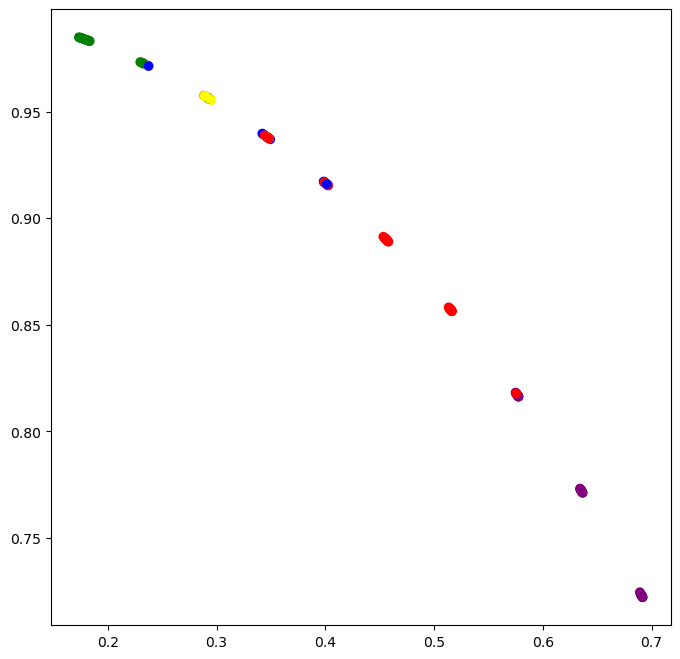

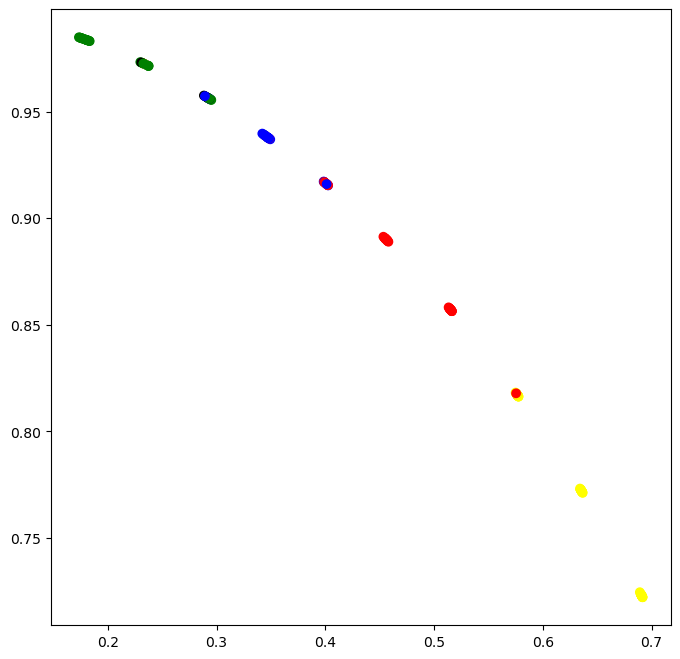

In [9]:

data_csv ="all_datasets_shuffeled (1).csv"
num_clusters =8
Qkmeans = QuantumKMeans(data_csv=data_csv, num_clusters=num_clusters,iters=10,features=['n_1_H','E_1_H'])
Qkmeans.run()

# check point

In [10]:
data.isnull().sum()

Unnamed: 0    0
target        0
n_1_H         0
E_0_H         0
E_1_H         0
E_apear       0
E_max         0
E_disapear    0
B_d           0
dtype: int64

In [67]:
data.dtypes

Unnamed: 0      int64
target          int64
n_1_H         float64
E_0_H         float64
E_1_H         float64
E_apear         int64
E_max           int64
E_disapear      int64
B_d           float64
dtype: object

In [68]:
np.unique(data["target"])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [70]:
np.unique(data['E_max'])

array([16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int64)

In [71]:
np.unique(data['E_0_H'])

array([6.12, 6.13, 6.14, 6.17, 6.18, 6.2 , 6.21, 6.22])

In [26]:
np.unique(data['n_1_H'])

array([ 42.47375,  42.68375,  42.7375 ,  43.59125,  43.97375,  44.17   ,
        44.32   ,  44.81125,  44.87375,  45.1675 ,  45.44875,  45.48125,
        45.49625,  45.82625,  45.89   ,  46.24875,  46.3375 ,  46.425  ,
        46.8025 ,  81.46   ,  81.7725 ,  82.0325 ,  82.81375,  82.87875,
        82.935  ,  83.00125,  83.43625,  83.5075 ,  83.52875,  83.705  ,
        83.81   ,  83.92625,  84.11125,  84.16   ,  85.33375,  85.75125,
        85.75375,  85.82625, 118.1875 , 118.72375, 118.7975 , 119.17   ,
       119.635  , 119.92375, 120.16875, 120.24625, 120.70375, 120.73875,
       120.81625, 120.96125, 121.0225 , 121.3925 , 121.44625, 121.7825 ,
       122.25875, 122.7    , 157.9725 , 158.8775 , 159.245  , 159.32375,
       160.0875 , 160.225  , 160.24875, 160.9025 , 161.2075 , 161.30125,
       161.36375, 161.76875, 161.82125, 161.9075 , 162.08875, 162.18375,
       162.33375, 162.495  , 163.11375, 206.8225 , 207.05875, 207.1125 ,
       207.53125, 207.58   , 207.95625, 208.095  , 